In [5]:
def daily_calorie_male(height, weight, age, activity_level):
    daily_calories = activity_level * (66 + (13.7 * weight) + (5 * height) - (6.8 * age))
    return daily_calories

In [8]:
daily_calorie_male(5.1,200,24,4)

10673.2

In [25]:
def women(weight,height,age,excercise):
    d = {'Sedentary' : 1.2,
        'Lightly active': 1.375,
        'Moderate': 1.55,
        'Active':1.725,
        'Very Active': 1.9}
    return ((9.99 * (weight * 0.453592)) + (6.25 *(height*2.54)) - (4.92 * age) - 161) * d[excercise]

def men(weight,height,age,excercise):
    d = {'Sedentary' : 1.2,
        'Lightly active': 1.375,
        'Moderate': 1.55,
        'Active':1.725,
        'Very Active': 1.9}
    return ((9.99 * (weight * 0.453592)) + (6.25 *(height*2.54)) - (4.92 * age) + 5) * d[excercise]
# For men, BMR = 66.47 + (13.75 x weight in kg) + (5.003 x height in cm) - (6.755 x age in years)

In [30]:
women(170,68,24,'Moderate')

2434.6707050800005

In [ ]:
Sedentary (little or no exercise): AMR = BMR x 1.2
Lightly active (exercise 1–3 days/week): AMR = BMR x 1.375
Moderately active (exercise 3–5 days/week): AMR = BMR x 1.55
Active (exercise 6–7 days/week): AMR = BMR x 1.725
Very active (hard exercise 6–7 days/week): AMR = BMR x 1.9

In [16]:
# Menu
# Ask whether to print BMI, BMR, or to exit
output = str(input('Calulate BMI or BMR or Exit: '))
print ('You entered: ' + output) # Try not to print 'random' info

# Exit, I put it up here to make sure the next step doesn't trigger
if output == 'exit' or output == 'Exit' or output == 'EXIT':
    print('Exiting...') # Try to always notify the user about what is going on
    exit()

# Check if the input is valid
if output != 'BMI' and output != 'bmi' and output != 'BMR' and output != 'bmr':
    print('Please enter a valid choice.')
    exit()

# Get user's height, weight and age values
# Never write code more than once, either place it in a function or
# take it elsewhere where it will be used once only
height = int(input('Please enter your height in inches: '))
weight = int(input('Please enter your weight in pounds: '))

# BMI
if output == 'BMI' or output == 'bmi':

   # Do the first steps of the formula
    heightSquared = (height * height)
    finalWeight = (weight * 703)

   # Figure out and print the BMI
    bmi = finalWeight / heightSquared

    if bmi < 18: # First step, is it less than 18?
        text = 'Underweight'

    elif bmi <= 24: # If it isn't is it less than or equal to 24?
        text = 'Ideal'

    elif bmi <= 29: # If not is it less than or equal to 29?
        text = 'Overweight'

    elif bmi <= 39: # If not is it less than or equal to 39?
        text = 'Obese'

    else: # If none of the above work, i.e. it is greater than 39, do this.
          text = 'Extremely Obese'

    print ('Your BMI is: ' + str(bmi))
    print ('This is: ' + text)

# BMR
elif output == 'bmr' or output == 'BMR':

    gender = str(input('Are you male (M) or female (F): '))
    age = int(input('Please enter your age in years: '))
    bmr = 0 # Initialize the bmr 

    if gender == 'M' or gender == 'm':
      # Figure out and print the BMR
        bmr = 66 + (6.2 * weight) + (12.7 * height) - (6.76 * age)

    if gender == 'F' or gender == 'f':
      # Figure out and print the BMR
        bmr = 655 + (4.35 * weight) + (4.7 * height) - (4.7 * age)

        print ('Your BMR is: ' + bmr)
 

Calulate BMI or BMR or Exit:  BMI


You entered: BMI


Please enter your height in inches:  70
Please enter your weight in pounds:  200


Your BMI is: 28.693877551020407
This is: Overweight


# Data cleaning and exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
interactions = pd.read_csv('data/RAW_interactions.csv')

In [3]:
interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [4]:
interactions.rating.value_counts()
import matplotlib.pyplot as plt 

<AxesSubplot:ylabel='Frequency'>

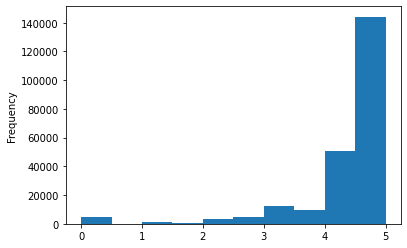

In [5]:
interactions.groupby('recipe_id')['rating'].mean().reset_index().rating.plot(kind='hist')

In [6]:
g = {'rating' : ['mean'],'user_id' : ['nunique']}
int_summary = interactions.groupby(['recipe_id']).agg(g).reset_index()
### Its gives a muti index output convert it to single index by cobining bothe level
ind = pd.Index([e[0] + "_" +e[1] for e in int_summary.columns.tolist()])
### Assign the column names 
int_summary.columns = ind
int_summary.columns = ['recipe_id', 'rating_mean', 'user_id_nunique']
### We will keep only those recipes in considerstaion which have been reviewed by more than 2 people
int_summary_94k = int_summary[ (int_summary['user_id_nunique'] > 2)]

In [10]:
int_summary_94k.iloc[2]

recipe_id          45.000000
rating_mean         2.666667
user_id_nunique     3.000000
Name: 5, dtype: float64

In [14]:
recipes = pd.read_csv('data/RAW_recipes.csv')

In [15]:
filter_recipe = pd.merge(recipes,int_summary_94k,right_on = ['recipe_id'],left_on = ['id'],how = 'inner')

In [30]:
import ast


# x = '[ "A","B","C" , " D"]'
# x = ast.literal_eval(x)
# x
# ['A', 'B', 'C', ' D']
# x = [n.strip() for n in x]
# x
# ['A', 'B', 'C', 'D']
filter_recipe

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,recipe_id,rating_mean,user_id_nunique
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,137739,5.000000,3
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,31490,3.500000,4
2,beat this banana bread,75452,70,15892,2003-11-04,"['weeknight', 'time-to-make', 'course', 'main-...","[2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]",12,"['preheat oven to 350 degrees', 'butter two 9x...",from ann hodgman's,"['sugar', 'unsalted butter', 'bananas', 'eggs'...",9,75452,4.400000,5
3,better than sex strawberries,42198,1460,41531,2002-10-03,"['weeknight', 'time-to-make', 'course', 'main-...","[734.1, 66.0, 199.0, 10.0, 10.0, 117.0, 28.0]",8,['crush vanilla wafers into fine crumbs and li...,simple but sexy. this was in my local newspape...,"['vanilla wafers', 'butter', 'powdered sugar',...",7,42198,3.800000,5
4,better then bush s baked beans,67547,2970,85627,2003-07-26,"['weeknight', 'time-to-make', 'course', 'main-...","[462.4, 28.0, 214.0, 69.0, 14.0, 29.0, 23.0]",9,['in a very large sauce pan cover the beans an...,i'd have to say that this is a labor of love d...,"['great northern bean', 'chicken bouillon cube...",13,67547,3.900000,10
5,chicken lickin good pork chops,63986,500,14664,2003-06-06,"['weeknight', 'time-to-make', 'course', 'main-...","[105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]",5,"['dredge pork chops in mixture of flour , salt...",here's and old standby i enjoy from time to ti...,"['lean pork chops', 'flour', 'salt', 'dry must...",7,63986,4.368421,19
6,chile rellenos,43026,45,52268,2002-10-14,"['60-minutes-or-less', 'time-to-make', 'course...","[94.0, 10.0, 0.0, 11.0, 11.0, 21.0, 0.0]",9,"['drain green chiles', 'sprinkle cornstarch on...",a favorite from a local restaurant no longer i...,"['egg roll wrap', 'whole green chilies', 'chee...",5,43026,4.045455,22
7,chinese candy,23933,15,35268,2002-03-29,"['15-minutes-or-less', 'time-to-make', 'course...","[232.7, 21.0, 77.0, 4.0, 6.0, 38.0, 8.0]",4,['melt butterscotch chips in heavy saucepan ov...,"a little different, and oh so good. i include ...","['butterscotch chips', 'chinese noodles', 'sal...",3,23933,4.833333,12
8,chinese chop suey,8559,70,4481,2001-01-27,"['weeknight', 'time-to-make', 'course', 'main-...","[395.4, 31.0, 20.0, 29.0, 51.0, 33.0, 8.0]",8,"['brown ground meat and onion in a large pot',...",easy one-pot dinner.,"['celery', 'onion', 'ground pork', 'soy sauce'...",7,8559,2.000000,4
9,cream of spinach soup,76808,45,95743,2003-11-17,"['60-minutes-or-less', 'time-to-make', 'course...","[126.0, 11.0, 2.0, 14.0, 5.0, 23.0, 4.0]",9,"['bring water and salt to a boil', 'cut the po...","wonderful comfort food from rozanne gold, a fa...","['water', 'salt', 'boiling potatoes', 'fresh s...",8,76808,4.666667,3


In [28]:
test_df = filter_recipe.copy()
#test_df['calories'] = test_df['nutrition']
test_df['nutrition'][

'[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]'

- Nutrition information:
    1. calories (#)
    2. total fat (PDV)
    3. sugar (PDV)
    4. sodium (PDV)
    5. protein (PDV)
    6. saturated fat (PDV)
    7. carbohydrates (PDV))

Percent Daily Value (PDV) on the Nutrition Facts label is a guide to the nutrients in one serving of food. For example, if the label lists 15% for calcium, it means that one serving provides 15% of the calcium you need each day.

DVs are based on a 2,000-calorie diet for healthy adults. Even if your diet is higher or lower in calories, you can still use the DV as a guide. For example, it tells you whether a food is high or low in a specific nutrient, defined as follows:

Low: 5% or less of a nutrient
High: 20% or more of a nutrient